In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("C:/Users/Isaac/OneDrive/Documents/UCLAEx_DataScience/R/Data")
df2 = pd.read_csv('W04a_churn.csv', na_values=[' '])

<h2>Logistic Regression: Churn Analysis</h2>

In [16]:

df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [17]:
df2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
# Clean up variables before converting into dummy variables

df2 = df2.replace({'Churn': {'Yes': 1, 'No': 0},
                   'MultipleLines':{'No phone service': 'No'},
                   'OnlineSecurity':{'No internet service':'No'},
                   'OnlineBackup':{'No internet service':'No'},
                   'DeviceProtection':{'No internet service':'No'},
                   'TechSupport':{'No internet service':'No'},
                   'StreamingTV':{'No internet service':'No'},
                  'StreamingMovies':{'No internet service':'No'}
                  })
df2['TotalCharges'] = df2['TotalCharges'].apply(pd.to_numeric, errors = 'coerce')

In [19]:
df3=pd.get_dummies(df2,columns=['gender','Partner','Dependents','PhoneService','MultipleLines',
                                'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                                'TechSupport','StreamingTV','StreamingMovies','Contract',
                                'PaperlessBilling','PaymentMethod'],drop_first=True)

In [20]:
df2['MultipleLines'].describe()

count     7032
unique       2
top         No
freq      4065
Name: MultipleLines, dtype: object

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

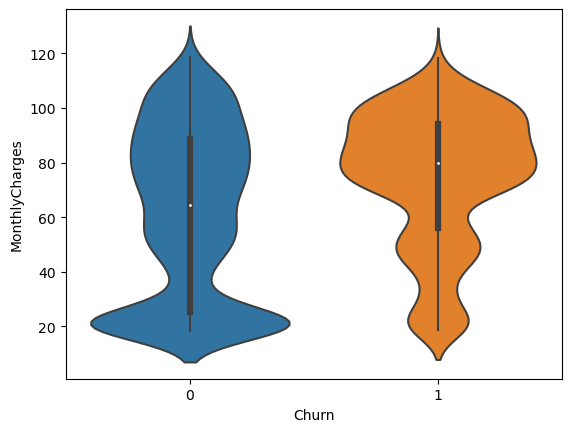

In [21]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=df2)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

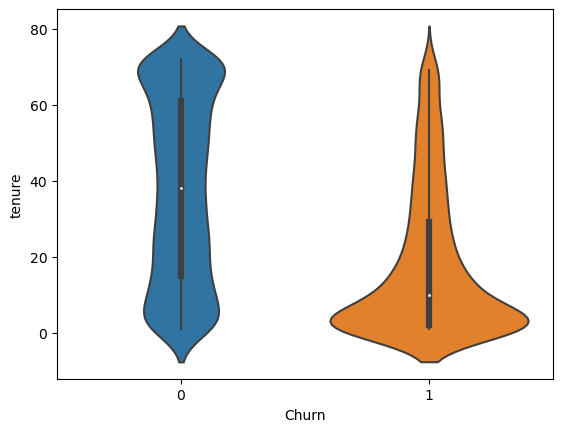

In [22]:
sns.violinplot(x="Churn", y="tenure", data=df2)

<h3>Logistic Regression</h3>

<h3>Model 1</h3> Selecting all variables minus unique ID

Model 1 - StatsModels Library

In [23]:
y1 = df3['Churn']
x1 = df3.drop(['Churn','customerID'], axis=1) 
X1 = sm.add_constant(x1) 
logit1 = sm.Logit(y1,X1)
eq01=logit1.fit()
print(eq01.summary())

Optimization terminated successfully.
         Current function value: 0.414269
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7008
Method:                           MLE   Df Model:                           23
Date:                Wed, 09 Nov 2022   Pseudo R-squ.:                  0.2845
Time:                        22:02:40   Log-Likelihood:                -2913.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.1653      

Model 1 - Sklearn

In [24]:
logit2 = LogisticRegression()
logit2.fit(X1, y1)
pred01 = logit2.predict(X1)
pred01

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In-Sample Prediction (Default threshold 0.5)

In [25]:
print(np.mean(pred01 == y1))
print(logit2.score(X1,y1))

0.805745164960182
0.805745164960182


In [26]:
print(logit2.predict_proba(X1)[:,0])  # Churn = 0 or "No"
print(logit2.predict_proba(X1)[:,1])  # Churn = 1 or "Yes"
print(logit2.predict(X1))  

[0.39558454 0.95447775 0.70544287 ... 0.6282546  0.25688921 0.93838115]
[0.60441546 0.04552225 0.29455713 ... 0.3717454  0.74311079 0.06161885]
[1 0 0 ... 0 1 0]


First and Last 3 samples look good!

Looking at Accuracy, Precision, Recall, F1, and Confusion Matrix

In [27]:
accuracy = metrics.accuracy_score(y1, pred01)
precision = metrics.precision_score(y1, pred01)
recall = metrics.recall_score(y1, pred01)
f1 = metrics.f1_score(y1, pred01)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

Accuracy: 0.806, Precision: 0.664, Recall: 0.546, F1: 0.599


In [28]:
confus1 = metrics.confusion_matrix(pred01, y1)
print('Confusion Matrix:\n', confus1)

Confusion Matrix:
 [[4646  849]
 [ 517 1020]]


<h4>ROC curve and AUC</h4>

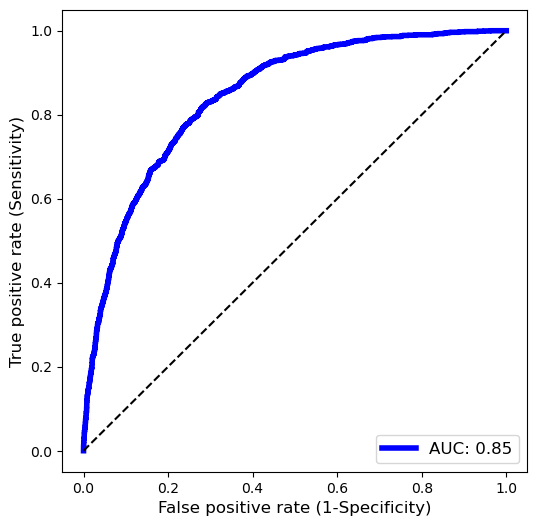

In [29]:
pred03_proba = logit2.predict_proba(X1)[:,1]
fpr, tpr, _ = metrics.roc_curve(y1, pred03_proba)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (6,6))
plt.plot(fpr,tpr, linewidth=4, color='blue', label="AUC: %0.2f" % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 45 degree line
plt.legend(loc=4, fontsize = 12)
plt.ylabel("True positive rate (Sensitivity)", fontsize = 12)
plt.xlabel("False positive rate (1-Specificity)",fontsize = 12)
plt.show()

<h4>Optimize Threshold</h4>

In [30]:
from sklearn.metrics import f1_score
from numpy import argmax
pred03_proba = logit2.predict_proba(X1)
probs = pred03_proba[:,1]
thresholds = np.arange(0, 1, 0.001) 
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
scores = [f1_score(y1, to_labels(probs, t)) for t in thresholds]
ix = argmax(scores)
print('Optimal Threshold = %.3f, F1-Score = %.4f' % (thresholds[ix], scores[ix]))

Optimal Threshold = 0.284, F1-Score = 0.6354


<h4>Use the optimal threshold to re-do prediction. Recall (Sensitivity) and F1 increase significantly.</h4>  

In [31]:
pred03 = list(map(lambda x1: 1 if x1 > 0.284 else 0, probs))
accuracy = metrics.accuracy_score(y1, pred03)
precision = metrics.precision_score(y1, pred03)
recall = metrics.recall_score(y1, pred03)
f1 = metrics.f1_score(y1, pred03)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

Accuracy: 0.766, Precision: 0.541, Recall: 0.769, F1: 0.635


<h2>Model 2</h2> Selecting only significant variables from Model 1 and all payment methods

Model 2 - StatsModels Library

In [32]:
y2 = df3['Churn']
x2 = df3.loc[:,['SeniorCitizen','tenure','TotalCharges','MultipleLines_Yes','InternetService_Fiber optic','InternetService_No','Contract_One year','Contract_Two year','PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']] 
X2 = sm.add_constant(x2) 
logit3 = sm.Logit(y2,X2)
eq02=logit3.fit()
print(eq02.summary())


Optimization terminated successfully.
         Current function value: 0.421652
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7019
Method:                           MLE   Df Model:                           12
Date:                Wed, 09 Nov 2022   Pseudo R-squ.:                  0.2718
Time:                        22:02:43   Log-Likelihood:                -2965.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5845      

Model 2 - Sklearn

In [33]:
logit4 = LogisticRegression()
logit4.fit(X2, y2)
pred02 = logit4.predict(X2)
pred02

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In-Sample Prediction (Default threshold 0.5)

In [34]:
print(np.mean(pred02 == y2))
print(logit4.score(X2,y2))

0.801052332195677
0.801052332195677


In [35]:
print(logit4.predict_proba(X2)[:,0])  # Churn = 0 or "No"
print(logit4.predict_proba(X2)[:,1])  # Churn = 1 or "Yes"
print(logit4.predict(X2))  

[0.48488095 0.94586097 0.59869273 ... 0.61071289 0.24883833 0.92252026]
[0.51511905 0.05413903 0.40130727 ... 0.38928711 0.75116167 0.07747974]
[1 0 0 ... 0 1 0]


Predictions look a little less reliable.  Lets check metrics.

Looking at Accuracy, Precision, Recall, F1, and Confusion Matrix

In [36]:
accuracy = metrics.accuracy_score(y2, pred02)
precision = metrics.precision_score(y2, pred02)
recall = metrics.recall_score(y2, pred02)
f1 = metrics.f1_score(y2, pred02)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

Accuracy: 0.801, Precision: 0.659, Recall: 0.521, F1: 0.582


In [37]:
confus2 = metrics.confusion_matrix(pred02, y2)
print('Confusion Matrix:\n', confus2)

Confusion Matrix:
 [[4659  895]
 [ 504  974]]


<h4>ROC curve and AUC</h4>

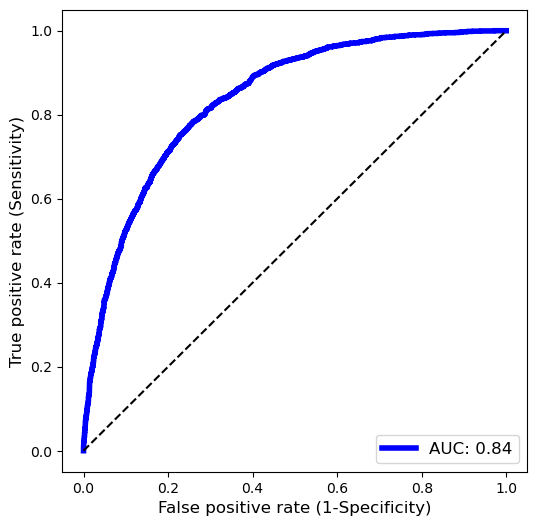

In [38]:
pred02_proba = logit4.predict_proba(X2)[:,1]
fpr, tpr, _ = metrics.roc_curve(y2, pred02_proba)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (6,6))
plt.plot(fpr,tpr, linewidth=4, color='blue', label="AUC: %0.2f" % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 45 degree line
plt.legend(loc=4, fontsize = 12)
plt.ylabel("True positive rate (Sensitivity)", fontsize = 12)
plt.xlabel("False positive rate (1-Specificity)",fontsize = 12)
plt.show()

<h4>Optimize Threshold</h4>

In [39]:
pred04_proba = logit4.predict_proba(X2)
probs = pred04_proba[:,1]
thresholds = np.arange(0, 1, 0.001) 
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
scores = [f1_score(y2, to_labels(probs, t)) for t in thresholds]
ix = argmax(scores)
print('Optimal Threshold = %.3f, F1-Score = %.4f' % (thresholds[ix], scores[ix]))

Optimal Threshold = 0.301, F1-Score = 0.6310


<h4>Use the optimal threshold to re-do prediction. Recall (Sensitivity) and F1 increase significantly.</h4>  

In [40]:
pred04 = list(map(lambda x2: 1 if x2 > 0.301 else 0, probs))
accuracy = metrics.accuracy_score(y2, pred04)
precision = metrics.precision_score(y2, pred04)
recall = metrics.recall_score(y2, pred04)
f1 = metrics.f1_score(y2, pred04)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

Accuracy: 0.767, Precision: 0.544, Recall: 0.751, F1: 0.631
